

# Project: Movie Data Analysis
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we'll be analyzing data set that contains information about 10,000 movies collected from The Movie Database (TMDb). 

In particular, we'll be interested in finding:

* which genres are most popular from year to year 
* what kinds of properties are associated with movies that have high revenues.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
df = pd.read_csv(r"C:\Users\Shelly\Desktop\UDACITY\Project 2\investigate-a-dataset-template.ipynb\tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# look at the shape of the dataset
df.shape

(10866, 21)

In [4]:
#look at the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning (Handling unused and missing values)
   * id,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,production_companies,release_date: seem unnecessary to include this for the type of intended analysis
   
* drop every rows that contain missing values

* remove duplicate rows
                       
    


In [6]:
#drop unnecessary columns to make the dataset cleaner
df.drop(['id','imdb_id','original_title','cast','homepage','director','tagline','keywords','overview','production_companies','release_date'],axis =1, inplace= True)

In [7]:
#rerun the shape of the dataset to make sure we drop the unnecessary columns
df.shape

(10866, 10)

In [8]:
#rerun the basic information of the dataset to see the missing values of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   runtime       10866 non-null  int64  
 4   genres        10843 non-null  object 
 5   vote_count    10866 non-null  int64  
 6   vote_average  10866 non-null  float64
 7   release_year  10866 non-null  int64  
 8   budget_adj    10866 non-null  float64
 9   revenue_adj   10866 non-null  float64
dtypes: float64(4), int64(5), object(1)
memory usage: 849.0+ KB


In [9]:
#we just drop the missing values of the genres since there is nothing we can do with them 
df.dropna(inplace = True)

In [10]:
df.shape

(10843, 10)

In [11]:
#check duplicated rows
df.duplicated().sum().sum()

1

In [12]:
#remove duplicated rows
df.drop_duplicates(inplace=True)

In [13]:
#double check duplicated rows
df.duplicated().sum().sum()

0

In [14]:
df['release_year'].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966], dtype=int64)

In [15]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [16]:
def sort_by_budget(df):
    return df.sort_values(by ='budget',ascending = False)['original_title'].head(1)

<a id='eda'></a>
## Exploratory Data Analysis


### Which genres are most popular from year to year?

In [17]:
# we split the column genres
df1=df.assign(genres = df['genres'].str.split('|')).explode('genres')

In [18]:
# counting the value of genres
df1.genres.value_counts()

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

In [19]:
#calculate the sum of the popularity using groupby genres
df_genres = df1.groupby(['genres']).sum()
df_genres

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
genres,,,,,,,,,
Action,2208.238255,66103123670,173542641094,250124,936897,13798.0,4768134,7.857690e+10,2.187517e+11
Adventure,1697.915054,55226774655,166425793633,156181,754807,8738.6,2941101,6.463182e+10,2.084043e+11
Animation,595.674975,16188687343,52603987494,47659,211797,4475.8,1400793,1.768145e+10,5.959403e+10
Comedy,2247.759649,50438993940,142337036180,366954,669223,22398.3,7589096,6.038575e+10,1.816733e+11
Crime,1008.635823,23916786723,57367167868,144766,377502,8293.1,2707311,2.915638e+10,7.668570e+10
Documentary,94.344445,300117557,1061375637,53379,18255,3592.4,1044323,3.240758e+08,1.174269e+09
Drama,2815.517715,56552216602,139145537255,525876,868912,29348.0,9524423,7.070282e+10,1.923856e+11
Family,968.388793,28755344365,89165240116,110302,335227,7383.0,2462953,3.314331e+10,1.080039e+11
Fantasy,909.441171,29873128179,88223309887,92275,385399,5371.0,1832268,3.428525e+10,1.018905e+11


In [20]:
df_genres['popularity']

genres
Action             2208.238255
Adventure          1697.915054
Animation           595.674975
Comedy             2247.759649
Crime              1008.635823
Documentary          94.344445
Drama              2815.517715
Family              968.388793
Fantasy             909.441171
Foreign              36.001309
History             192.362605
Horror              761.788804
Music               198.827043
Mystery             558.909827
Romance            1013.644468
Science Fiction    1230.902062
TV Movie             45.239592
Thriller           2155.723620
War                 196.474450
Western              97.451554
Name: popularity, dtype: float64

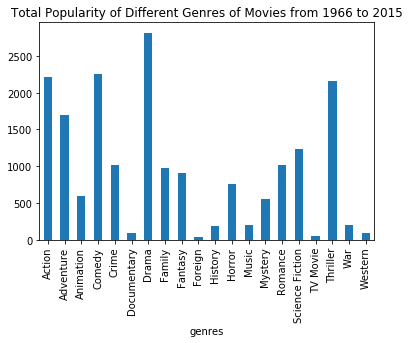

In [21]:
df_genres['popularity'].plot(x='genres',y='total popularity',kind='bar',

title = 'Total Popularity of Different Genres of Movies from 1966 to 2015')

### Based on the bar chart above, we could see that:
Drama movies are the most popular genre from 1966 to 2015. Comedy, action and thriller genres are not far behind.

### What kinds of properties are associated with movies that have high revenues?

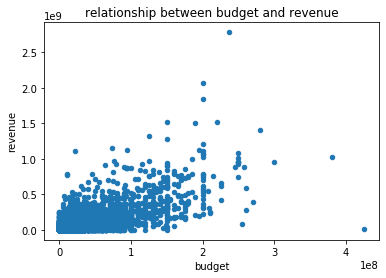

In [22]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# let us see the relationship between budget and revenue
df.plot(x='budget',y='revenue',kind = 'scatter',
        title = 'relationship between budget and revenue')

### Based on the scatter box chart above, we could see that:
Budget and revenue have a positive relationship with each other. However, there exist some movies that have high budget but low revenue or low budget with extremely high revenue.

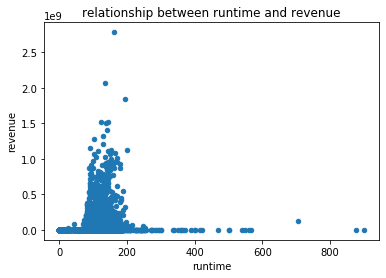

In [23]:
# let us see the relationship between runtime and revenue
df.plot(x='runtime',y='revenue',kind = 'scatter',
        title = 'relationship between runtime and revenue')

### Based on the scatter box chart above, we could see that:
The average runtime is between 100-200. The plot shows that even though some movies have much more runtime than the others, their revenues are still low. The movies that make a lot of money, however, have the average runtime.

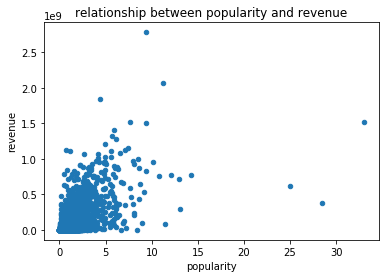

In [24]:
# let us see the relationship between popularity and revenue
df.plot(x='popularity',y='revenue',kind = 'scatter',
        title = 'relationship between popularity and revenue')

### Based on the scatter box chart above, we could see that:
Most movies have similar popularity. Even if some movies have extremely higher popularity than others, they did not make much more revenue as they deserved.

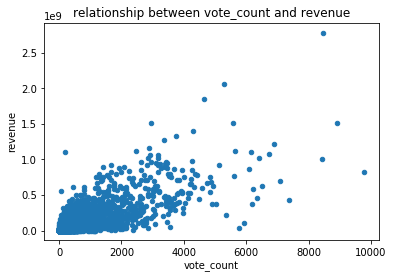

In [25]:
# let us see the relationship between vote_count and revenue
df.plot(x='vote_count',y='revenue',kind = 'scatter',
        title = 'relationship between vote_count and revenue')

### Based on the scatter box chart above, we could see that:
Vote count seems have a postive relationship with revenue, the more vote count the movies got, the more revenue they made.

<a id='conclusions'></a>
## Conclusions

From the first bar chart, we have known that drama movies are the most popular genre from 1966 to 2015 followed by Comedy, action and thriller genres. 

We have seen the relationship beween budget and revenue, runtime and revenue, popularity and revenue and vote count and revenue. Budget and vote count seem to have a relatively positive correlation, however, there still exists a certain amount of movies that have a quite low revenue although they have received high vote counts and made more budget than the others. 
Moreover, we could see from the scatter plot that runtime for most of the movies are beween 100 to 200 but they still have various of revenue range. 
Lastly, even though popularity has a positive relationship with revenue, the popularities of most movies are still no more than 10 units. 


**Limitations**

Since there are some movies that are from different kinds of genres, it makes more confusing for us to calculate the accurate revenue for that genre. Also, if we could investigate the real rate from the audience that actually watch the whole movie, it would make popularity more convincing.